<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: <!-- Your answers goes here -->
The first pair of datasets,train_1 (6769 rows and 17 columns) and valid_1 (1693 rows and 17 columns) which lesser as compared to second pair of datasets, train_2 (28934 rows and 17 columns) and valid_2 (7234 rows and 17 columns). The train_1 conatins more noise and outliers as compared to train_2. Since, data in train_2 and valid_2 is more than that of train_1 and valid_1 may lead to better accuracy of model trained and validated on second train_2 and valid_2

The training datasets is used to train a model using a supervised learning method. The training data sets contains input vector and corresponding target vector or scalar. The model produces a result corresponding to a input vector and this result (also called as predicted value) is compared with the target vector or actual result. Based on this comparison and the learning algorithm being used, the parameters of the model are modified, on the other hand, the validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. $\alpha$ (learning rate) , $\lambda$ (regularisation parameter), the number of hidden units in a neural network, threshold of an activation function). Validation datasets can be used for regularization by early stopping, i.e. stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. 


### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.

2.Find all categorical features and process them as was discussed in class. List those features and explain what you did.

3.Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.

Write your text-based answers here.


1.   Answer for bullet one
Answer : Features with continuous numeric variables are - Age, Balance, Day,Duration,Campaign,pdays,previous.
2.   Answer for bullet two
Answer :  Categorical features : job,marital,education,default, housing,loan,contact, month,poutcome. Categorical  data  are variables that contain label values rather than numeric values. It is required to perform one hot encoding on categorical feature so that it is converted into numerical form as many machine learning algorithms can not operate on labels directly.
3.   Answer for bullet three
Answer : Yeah some features contained "unknown" in their missing values and other feature(e.g - pdays) contained erratic values. I will handle them through one hot-encoding in case of categorical data and by elimination of the features(with a lot of missing or erroreneous values in case of continuous numeric. If a few values are missing in a numeric feature, then those missing values can be replced by mean value of the feature. In case of categorical data, the missing values can be replaced by mode value of the feature. If there are missing values i.e no data is available and it is left blank in the dataset, then we can handle through isnull(), which gives us the detail of missing values.




In [217]:
# PROBLEM 1, TASK 1 CODE GOES HERE
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
#from sklearn.preprocessing import standardScalar

data_train_1 = pd.read_csv("train_1.csv")
data_valid_1=pd.read_csv("valid_1.csv")
data_train_2 = pd.read_csv("train_2.csv")
data_valid_2=pd.read_csv("valid_2.csv")
data_test =pd.read_csv("test.csv")
# print(data_train_1.shape)
# print(data_valid_1.shape)
# print(data_train_2.shape)
# print(data_valid_2.shape)
# print(data_test.shape)

#storing Target Variable to different a location
targetTrain1 = data_train_1['y']
targetValid1 = data_valid_1['y']
targetTrain2 = data_train_2['y']
targetValid2 = data_valid_2['y']
targetTest   = data_test['y']
data_train_1.drop("y",axis=1,inplace=True)
data_valid_1.drop("y",axis=1,inplace=True)
data_train_2.drop("y",axis=1,inplace=True)
data_valid_2.drop("y",axis=1,inplace=True)
data_test.drop("y",axis=1,inplace=True)

#Dropping a irrelevant feature with a lot of erroreneous data
data_train_1.drop("pdays",axis=1,inplace=True)
data_valid_1.drop("pdays",axis=1,inplace=True)
data_train_2.drop("pdays",axis=1,inplace=True)
data_valid_2.drop("pdays",axis=1,inplace=True)
data_test.drop("pdays",axis=1,inplace=True)


#features with continuous numeric value
data_train1 = data_train_1.select_dtypes(include=['int64'])
data_train2 = data_train_2.select_dtypes(include=['int64'])
data_valid1 = data_valid_1.select_dtypes(include=['int64'])
data_valid2 = data_valid_2.select_dtypes(include=['int64'])
data_test1 = data_test.select_dtypes(include=['int64'])
print(data_train1)

#Normalisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Ntrain1=sc.fit_transform(data_train1)
Ntrain2=sc.fit_transform(data_train2)
Nvalid1=sc.fit_transform(data_valid1)
Nvalid2=sc.fit_transform(data_valid2)
Ntest=sc.fit_transform(data_test1)
#Ntrain1
#Ntrain2
#Nvalid1
#Nvalid2

#find categorical feature
data_train1_cat = data_train_1.select_dtypes(exclude=['int64'])
data_train2_cat = data_train_2.select_dtypes(exclude=['int64'])
data_valid1_cat = data_valid_1.select_dtypes(exclude=['int64'])
data_valid2_cat = data_valid_2.select_dtypes(exclude=['int64'])
data_test_cat  =  data_test.select_dtypes(exclude=['int64'])

print(data_train1_cat)
#data_train2_cat
#data_valid1_cat
#data_valid2_cat


#processing of categorical data
xtrain1_cat=pd.get_dummies(data_train1_cat)
# print(xtrain1_cat.columns)
xtrain2_cat=pd.get_dummies(data_train2_cat)
#print(xtrain2_cat)
xvalid1_cat=pd.get_dummies(data_valid1_cat)
#print(xvalid1_cat)
xvalid2_cat=pd.get_dummies(data_valid2_cat)
# print(xvalid2_cat)
xtest_cat=pd.get_dummies(data_test_cat)
# print(xtest_cat)

# concatinating features with numeric feature(normalised) with processed categorical data
Ntrain1 = pd.concat([pd.DataFrame(Ntrain1),xtrain1_cat], axis=1)
Ntrain2 = pd.concat([pd.DataFrame(Ntrain2),xtrain2_cat], axis=1)
Nvalid1 = pd.concat([pd.DataFrame(Nvalid1),xvalid1_cat], axis=1)
Nvalid2 = pd.concat([pd.DataFrame(Nvalid2),xvalid2_cat], axis=1)
Ntest = pd.concat([pd.DataFrame(Ntest),xtest_cat], axis=1)

#Are there any features which have missing values
print(data_train_1.isnull().sum())
data_train_2.isnull().sum()
data_valid_1.isnull().sum()
data_valid_2.isnull().sum()


# preparation of Target variable
y_train1=pd.get_dummies(targetTrain1)
y_train2=pd.get_dummies(targetTrain2)
y_valid1=pd.get_dummies(targetValid1)
y_valid2=pd.get_dummies(targetValid2)
y_test  =pd.get_dummies(targetTest)

y_train1.drop("no",axis=1,inplace=True)
y_train2.drop("no",axis=1,inplace=True)
y_valid1.drop("no",axis=1,inplace=True)
y_valid2.drop("no",axis=1,inplace=True)
y_test.drop("no",axis=1,inplace=True)



print(Ntrain1.shape)
print(y_valid1.shape)
print(Ntrain2.shape)
print(y_valid2.shape)


      age  balance  day  duration  campaign  previous
0      58        0    2       478         2         0
1      47     -216    6       197         1         3
2      31       59    6      1347         2         1
3      60      824    9       265         1         8
4      42      -91    5        43         1         0
5      59       57   22       212        11         0
6      62        6   13       216         1         4
7      44       67    6       220         2         0
8      53      173    1       157         1         0
9      49      914    4       185         1         0
10     37      549    2       239         1         0
11     51     1435   11       587         1         0
12     53      587   19       561         1         0
13     43     3064   20      2453         2         0
14     38      797   11       124         4         0
15     38     2350   30       101         2         0
16     33        5    7        12         1         0
17     28       16    5     

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
dtype: int64
(6769, 50)
(1693, 1)
(28934, 50)
(7234, 1)


### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

value of maximum Accuracy:  0.816302
value of lambda for maximum accuracy:0.010200
Maximum Accuracy_test :0.751078


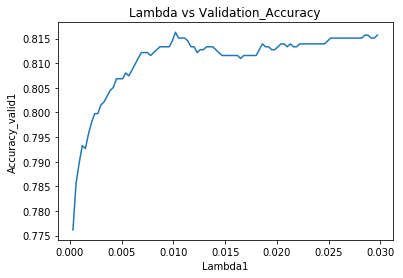

In [206]:
# PROBLEM 1, TASK 2 CODE GOES HERE
#Training the model
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
Lambda1=[]
Accuracy_valid1=[]
Lambda_test1=[]
Accuracy_test1=[]
for i in range(1,100):
    
    lam = (0.0003*(i))
    logmodel=LogisticRegression("l2",C=lam)
    logmodel.fit(Ntrain1,y_train1)
    
    predictedX = logmodel.predict(Nvalid1)
    

    
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_valid1,predictedX)
    Lambda1.append(lam)
    Accuracy_valid1.append(acc)
    
    #Testing_accuracy_score for test
    predictedX_test1 = logmodel.predict(Ntest)
    accuracy_test = accuracy_score(y_test, predictedX_test1)
    Lambda_test1.append(lam)
    Accuracy_test1.append(accuracy_test)


k1=max(Accuracy_valid1)
print("value of maximum Accuracy:%10f"% k1)
print("value of lambda for maximum accuracy:%5f"% Lambda1[(Accuracy_valid1.index(k1))])
plt.ylabel('Accuracy_valid1')
plt.xlabel('Lambda1')
plt.plot(Lambda1,Accuracy_valid1)
plt.title("Lambda vs Validation_Accuracy")
print("Maximum Accuracy_test :%5f"%max(Accuracy_test1))

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

value of maximum Validation Accuracy:  0.900608
value of lambda for maximum accuracy:0.039000
Maximum Accuracy_test_data :0.901139


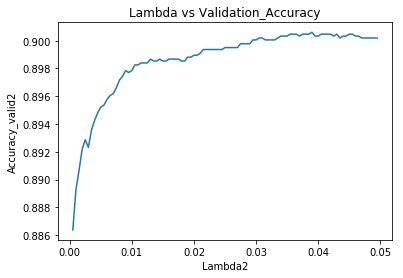

In [207]:
# PROBLEM 1, TASK 3 CODE GOES HERE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
Lambda2=[]
Accuracy_valid2=[]
Lambda_test2=[]
Accuracy_test2=[]

for ccc in range(1,100):
    
    lam1 = (0.0005*(ccc))
    logmodel1=LogisticRegression("l2",C=lam1)
    logmodel1.fit(Ntrain2,y_train2)
    
    predictedX_valid2 = logmodel1.predict(Nvalid2)
    
    from sklearn.metrics import classification_report
    classification_report(y_valid2,predictedX_valid2)
    from sklearn.metrics import confusion_matrix
    #print(confusion_matrix(y_valid2,predictedX_valid2))
    
    #validation_accuracy_score
    from sklearn.metrics import accuracy_score
    acc2 = accuracy_score(y_valid2,predictedX_valid2)
    Lambda2.append(lam1)
    Accuracy_valid2.append(acc2)
    
    #Testing_accuracy_score for test
    predictedX_test = logmodel1.predict(Ntest)
    accuracy_test = accuracy_score(y_test, predictedX_test)
    Lambda_test2.append(lam1)
    Accuracy_test2.append(accuracy_test)

k=max(Accuracy_valid2)
print("value of maximum Validation Accuracy:%10f"% k)
print("value of lambda for maximum accuracy:%5f"% Lambda2[(Accuracy_valid2.index(k))])
plt.ylabel('Accuracy_valid2')
plt.xlabel('Lambda2')
plt.plot(Lambda2,Accuracy_valid2)
plt.title("Lambda vs Validation_Accuracy")
print("Maximum Accuracy_test_data :%5f"%max(Accuracy_test2))

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

value of maximum Accuracy:  0.900885
value of lambda for maximum accuracy:0.128000
value of threshold for maximum accuracy:0.510000


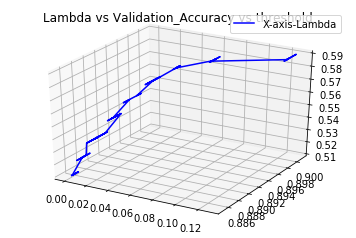

In [208]:
# PROBLEM 1, TASK 4 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
Lambda3=[]
Accuracy_valid3=[]
ThresholdList = []


maxa = optLam = optThresh = 0
threshold = 0.5
for thresh in range(1,10):
    for reg in range(1,10):
        lam3 = 0.0005*2**(reg-1)
        threshold = 0.5+ 0.01*thresh
        logmodel2=LogisticRegression("l2",C=lam3)
        logmodel2.fit(Ntrain2,y_train2)
        
        predictedX_valid3_orig = logmodel2.predict(Nvalid2)
        predictedX_valid3_ = logmodel2.predict_proba(Nvalid2)[:,1]
        predictedX_valid3 = np.copy(predictedX_valid3_)
        predictedX_valid3[predictedX_valid3_<threshold] = 0
        predictedX_valid3[predictedX_valid3!=0] = 1
        # predictedX_valid3 = predictedX_valid3.reshape(predictedX_valid3.shape[0])
        
        #validation_accuracy_score
        from sklearn.metrics import accuracy_score
        acc3 = accuracy_score(np.array(y_valid2).reshape(y_valid2.shape[0]),predictedX_valid3)
        Lambda3.append(lam3)
        Accuracy_valid3.append(acc3)
        ThresholdList.append(threshold)
        #print(lam3, threshold, acc3)
        if(maxa<acc3):
            maxa = acc3
            optLam = lam3
            optThresh = threshold
            
        

predictedX_valid3_orig = logmodel2.predict(Nvalid2)

Accuracy_valid3 = np.array(Accuracy_valid3)
sorted_accuracy=Accuracy_valid3[np.argsort(Lambda3)]
sorted_Lambda3=np.sort(Lambda3)

k3=max(Accuracy_valid3)
print("value of maximum Accuracy:%10f"% k3)
print("value of lambda for maximum accuracy:%5f"% optLam)
print("value of threshold for maximum accuracy:%5f"% optThresh)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#plt.zlabel('threshold')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Axes3D.plot3D(ax,xs=sorted_Lambda3,ys=sorted_accuracy,zs=ThresholdList,color="b",label="X-axis-Lambda")
#plt.plot(sorted_Lambda3,sorted_accuracy,"b")
plt.title("Lambda vs Validation_Accuracy vs threshold")
plt.legend()




In [209]:
#Test_accuracy_score

Lambda4_test3=[]
Accuracy4_test3=[]
maxa1 = optLam1 = optThresh1 = 0
threshold1 = 0.5
for thresh1 in range(1,50):
    for reg1 in range(1,50):
        lam4 = 0.00005*2**(reg1-1)
        threshold1 = 0.5+ 0.01*thresh1
        logmodel2=LogisticRegression("l2",C=lam3)
        logmodel2.fit(Ntrain2,y_train2)
        
        predictedX_test4_orig = logmodel2.predict(Ntest)
        predictedX_test4_ = logmodel2.predict_proba(Ntest)[:,1]
        predictedX_test4 = np.copy(predictedX_test4_)
        predictedX_test4[predictedX_test4_<threshold1] = 0
        predictedX_test4[predictedX_test4!=0] = 1
        
       
        
        from sklearn.metrics import accuracy_score
        acc4 = accuracy_score(np.array(y_test).reshape(y_test.shape[0]),predictedX_test4)
        Lambda4_test3.append(lam4)
        Accuracy4_test3.append(acc4)
        #print(lam4, threshold1, acc4)
        if(maxa1<acc4):
            maxa1 = acc4
            optLam1 = lam4
            optThresh1 = threshold1
p=max(Accuracy4_test3)
print("value of maximum Accuracy for test:%10f"% p)
print("value of lambda for maximum accuracy for test:%5f"% optLam1)
print("value of threshold for maximum accuracy for test:%5f"% optThresh1)
            
        

value of maximum Accuracy for test:  0.900918
value of lambda for maximum accuracy for test:0.000050
value of threshold for maximum accuracy for test:0.510000


### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.

Answer: The detailed report on performance of Models has been shown below. The training dataset 2 has more training data than that of training set 1,this may be the reason of good accuarcy of model B  For model"A", training set1 contains more noise and outliers as compared to training set2 used for model B and model C, due to which accuracy in case of model "B" & model "C" is more than that of model "A".As Validation set1 used for model A is small as compared to validation set2 used in model B & model C, there is a possibilty of better tuning of hyperparameter in case of model B & C as compared to model A, as while validation hyperparameter(e.g Lambda in case of regularisation) is tuned to get more reliable model. 

2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

Answer: I think the metric used to find the best hyperparameter is a good metric, as validation accuarcy and testing accuracy is  90% in model B and C, which seems to good enough to rely upon metric. 



In [210]:
1.#Report on the performance of model A
#Validation Accuracy Report of model A
print("Report on the performance of model A")
print("Validation Accuracy Report of model A")
from sklearn.metrics import classification_report
print("value of maximum Accuracy for model A:%10f"% k1)
print("classification_report for model A for validation_data1:")
print(classification_report(y_valid1,predictedX))
from sklearn.metrics import confusion_matrix
M=confusion_matrix(y_valid1,predictedX)
print("confusion_matrix for model A for validation_data1 :")
print(M)

#Test Accuracy report of model A
print("Test Accuracy Report of model A")
from sklearn.metrics import classification_report
print("Maximum Accuracy_test :%5f"%max(Accuracy_test1))
print("classification_report for model A for test_data:")
print(classification_report(y_test, predictedX_test))
from sklearn.metrics import confusion_matrix
M_test=confusion_matrix(y_test, predictedX_test1)
print("confusion_matrix for model A for test_data :")
print(M_test)



#Report on the performance of model B
#validation Accuracy Report
print("validation Accuracy Report of model B")
print("value of maximum Accuracy for model B:%10f"% k)
from sklearn.metrics import classification_report
print("classification_report for model B for validation_data2:")
print(classification_report(y_valid2,predictedX_valid2))
from sklearn.metrics import confusion_matrix
M1=confusion_matrix(y_valid2,predictedX_valid2)
print("confusion matrix for model B for validation data set")
print(M1)

#Test Accuracy report of model B
print("Test Accuracy Report of model B")
from sklearn.metrics import classification_report
print("Maximum Accuracy_test :%5f"%max(Accuracy_test2))
print("classification_report for model B for test_data:")
print(classification_report(y_test, predictedX_test))
from sklearn.metrics import confusion_matrix
M1_test=confusion_matrix(y_test, predictedX_test)
print("confusion_matrix for model B for test_data :")
print(M1_test)


#Report on the performance of model C
#validation Accuracy Report
print("validation Accuracy Report of model C")
print("value of maximum Accuracy for model B:%10f"% k3)
from sklearn.metrics import classification_report
print(classification_report(y_valid2,predictedX_valid3))
from sklearn.metrics import confusion_matrix
M2=confusion_matrix(y_valid2,predictedX_valid3)
print("confusion matrix for model C for validation data set")
print(M2)

#Test Accuracy report of model C
print("Test Accuracy Report of model C")
from sklearn.metrics import classification_report
print("Maximum Accuracy_test :%5f"% p)
print("classification_report for model C for test_data:")
print(classification_report(y_test, predictedX_test4))
from sklearn.metrics import confusion_matrix
M4_test=confusion_matrix(y_test, predictedX_test4)
print("confusion_matrix for model C for test_data :")
print(M4_test)




Report on the performance of model A
Validation Accuracy Report of model A
value of maximum Accuracy for model A:  0.816302
classification_report for model A for validation_data1:
             precision    recall  f1-score   support

          0       0.81      0.83      0.82       847
          1       0.83      0.80      0.81       846

avg / total       0.82      0.82      0.82      1693

confusion_matrix for model A for validation_data1 :
[[704 143]
 [169 677]]
Test Accuracy Report of model A
Maximum Accuracy_test :0.751078
classification_report for model A for test_data:
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7985
          1       0.65      0.34      0.44      1058

avg / total       0.89      0.90      0.89      9043

confusion_matrix for model A for test_data :
[[5818 2167]
 [  84  974]]
validation Accuracy Report of model B
value of maximum Accuracy for model B:  0.900608
classification_report for model B for valid

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

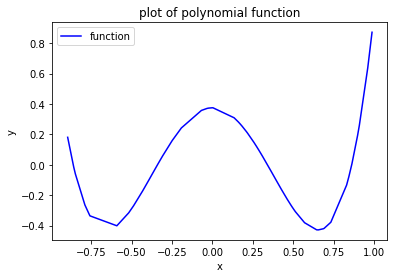

In [211]:
import numpy as np
from scipy.special import legendre
from numpy.polynomial.polynomial import polyval
import matplotlib.pyplot as plt
def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    x=np.random.uniform(low,high,60)
    x=np.sort(x)
    y=polyval(x,w)
    plt.plot(x,y,"b",label="function")
    plt.title("plot of polynomial function")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()



## TEST CASES (The following lines should plot a function)
visualize_function(4, -1, 1)
# visualize_function(4, -1, 1)
# visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [212]:
from numpy.polynomial.polynomial import polyval
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
    X_train=np.random.uniform(-1,1,n_train)
    y_train=polyval(X_train,w)+np.random.normal(0, sigma,n_train)
    X_test=np.random.uniform(-1,1,n_test)
    y_test=polyval(X_test,w)+np.random.normal(0, sigma,n_test)
    
  
    return X_train, y_train, X_test, y_test
generate_dataset(45, 20, 20, 0.2)


(array([ 0.3630848 ,  0.10420856,  0.30183224, -0.13958537, -0.8103634 ,
        -0.61270407,  0.88890313, -0.4003541 ,  0.55447787,  0.87516213,
         0.19565268, -0.82790278, -0.44603349,  0.46259059,  0.58902617,
        -0.25673384,  0.11888326, -0.21610779,  0.44106315,  0.94698735]),
 array([-1.64857326e-01, -9.51882081e-02, -1.55755259e-01,  1.97420043e-01,
        -3.50345792e+02,  3.67296887e-01,  4.36615651e-02,  1.13102567e-01,
        -3.03310961e-01, -3.37790898e-01,  1.43995583e-01, -6.83525977e+02,
        -4.66790960e-02,  2.94693973e-01, -2.44581645e-01,  1.40480926e-01,
         2.74735821e-01,  4.72541847e-02,  4.62863955e-01, -3.68115860e-04]),
 array([-0.13136424,  0.44475984, -0.18834207, -0.98116891, -0.73255661,
        -0.86580655, -0.70796013,  0.80173677,  0.82040835, -0.89799457,
        -0.08832898,  0.26756859,  0.62210513, -0.23507571,  0.44123272,
         0.58963666,  0.74763613,  0.46410401,  0.49659033,  0.9499929 ]),
 array([-8.44542087e-02,  4.44

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance. Answer : 
 - Give a detailed explanation of why this happens.
 
 Answer:  
The training error for model "A" i.e quadratic model is more than that of model "B" i.e a model of degree 10. This is true as increase in degree will make function more flexible and hence model with higher degree does its best to account for every single point and hence has good accuracy score on training data.
I also observed that the test error for model "A" i.e quadratic model is less than that of model of 10 degree. This may be due to ovrefitting of data or due to training on noise data in case of model of 10 degree.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

The coeffiecients of the generated model
[ 0.          0.14523719 -0.16159382]
Mean Squared Error for test model A:  0.14581605409122372
Mean Squared Error for train model A:  0.07340269648485691


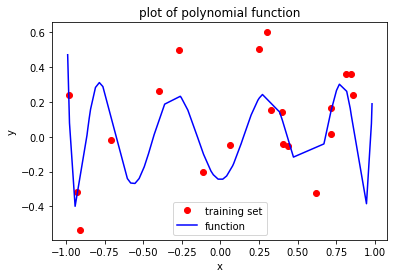

In [213]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Model A - Degree 2
#Generation of datasets
X_train1, y_train1, X_test1, y_test1 = generate_dataset(10, 20, 20, 0.2)
plt.plot(X_train1,y_train1,"ro",label="training set")
plt.legend()

visualize_function(10, -1, 1)
X1= X_train1.reshape(-1,1)
y1= y_train1
polynomial=PolynomialFeatures(degree=2)

polynomial.fit_transform(X1)
k1=make_pipeline(polynomial,LinearRegression())
k1.fit(X1,y1)
coef1 = k1.steps[1][1].coef_
#print(polynomial.get_feature_names())
print("The coeffiecients of the generated model")
print(coef1)

pred = k1.predict(X_test1.reshape(-1,1))

from sklearn.metrics import mean_squared_error
err_test1= mean_squared_error(y_test1,pred)
print('Mean Squared Error for test model A: ', err_test1)

pred1 = k1.predict(X_train1.reshape(-1,1))

err_train1=mean_squared_error(y_train1,pred1)
print('Mean Squared Error for train model A: ', err_train1)

The coeffiecients of the generated model
[   0.           -8.31490353   11.43776178   63.6334858  -171.23226178
 -167.6145728   548.39750572  181.90293811 -665.54297537  -69.81286404
  276.28304752]
Mean Squared Error for test model B:  2.097073397635116
Mean Squared Error for train model B:  0.0058190969728799434
training error and testing error on both these models
         MSE_Train  MSE_Test
Model A   0.073403  0.145816
Model B   0.005819  2.097073


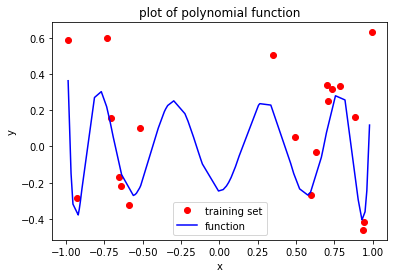

In [214]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Model B - Degree 10
#Generation of datasets
X_train2, y_train2, X_test2, y_test2 = generate_dataset(10, 20, 20, 0.2)
plt.plot(X_train2,y_train2,"ro",label="training set")
plt.legend()
visualize_function(10, -1, 1)
X= X_train2.reshape(-1,1)
y = y_train2
polynomial=PolynomialFeatures(degree=10)

polynomial.fit_transform(X)
k=make_pipeline(polynomial,LinearRegression())
k.fit(X,y)
coef = k.steps[1][1].coef_
#print(polynomial.get_feature_names())

print("The coeffiecients of the generated model")
print(coef)

pred = k.predict(X_test2.reshape(-1,1))


from sklearn.metrics import mean_squared_error
err_test= mean_squared_error(y_test2,pred)
print('Mean Squared Error for test model B: ', err_test)

pred1 = k.predict(X_train2.reshape(-1,1))

err_train=mean_squared_error(y_train2,pred1)
print('Mean Squared Error for train model B: ', err_train)



#Reporting Errors in a table
data= [{"MSE_Train": err_train1,"MSE_Test": err_test1},{"MSE_Train": err_train,"MSE_Test": err_test}]

df1 = pd.DataFrame(data, index=['Model A', 'Model B'], columns=['MSE_Train', 'MSE_Test'])

print("training error and testing error on both these models")
print (df1)

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

Answer: 

Since the target doesn't contain noise, then accuarcy of this model should be high but we get large value of error for this case as compared to case 1, This may be due to underfitting, as dataset set generated is of 45 degree and predicted model is of 2 degree and 10 degree and, coeffiecients generated are also high, hence in second case(i.e task 4)we are getting very high values of error.

The training error for model "A" i.e quadratic model is more than that of model "B" i.e a model of degree 10. This is true as increase in degree will make function more flexible and hence model with higher degree does its best to account for every single point and hence has good accuracy score on training data.
I also observed that the test error for model "A" i.e quadratic model is less than that of model of 10 degree. This may be due to ovrefitting of data in case of model of 10 degree.
 

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

The coeffiecients of the generated model
[    0.          1017.28852001 -1941.94958211]
Mean Squared Error for test model A:  377728.34395526873
Mean Squared Error for train model A:  397381.8809930928


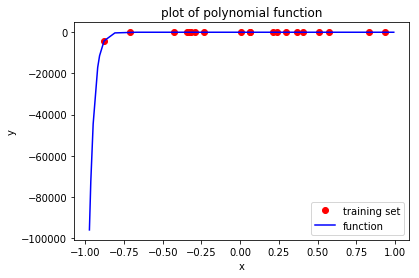

In [215]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Model A - 
#Generation of datasets
X_train4, y_train4, X_test4, y_test4 = generate_dataset(45, 20, 20, 0)
plt.plot(X_train4,y_train4,"ro",label="training set")
plt.legend()
visualize_function(45, -1, 1)
X4= X_train4.reshape(-1,1)
y4= y_train4
polynomial=PolynomialFeatures(degree=2)

polynomial.fit_transform(X4)
k4=make_pipeline(polynomial,LinearRegression())
k4.fit(X4,y4)
coef4 = k4.steps[1][1].coef_
#print(polynomial.get_feature_names())

print("The coeffiecients of the generated model")
print(coef4)

pred4 = k4.predict(X_test4.reshape(-1,1))

from sklearn.metrics import mean_squared_error
err_test4= mean_squared_error(y_test4,pred4)
print('Mean Squared Error for test model A: ', err_test4)

predict4 = k4.predict(X_train4.reshape(-1,1))

err_train4=mean_squared_error(y_train4,predict4)
print('Mean Squared Error for train model A: ', err_train4)




The coeffiecients of the generated model
[       0.            15477.87770492  -145679.19792451  -220876.52019582
  1247377.64535122  1048334.39426163 -4094883.17286403 -1908452.22412856
  5722783.84212519  1153019.92842051 -2860725.80174728]
Mean Squared Error for test model B:  31018644.02355454
Mean Squared Error for train model B:  2570070.7821373264
training error and testing error on both these models
            MSE_Train      MSE_Test
Model A  3.973819e+05  3.777283e+05
Model B  2.570071e+06  3.101864e+07


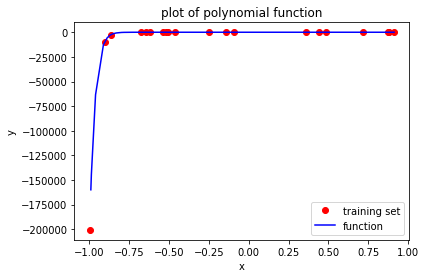

In [216]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Model B - 
#Generation of datasets
X_train5, y_train5, X_test5, y_test5 = generate_dataset(45, 20, 20, 0)
plt.plot(X_train5,y_train5,"ro",label="training set")
plt.legend()
visualize_function(45, -1, 1)
X5= X_train5.reshape(-1,1)
y5= y_train5
polynomial=PolynomialFeatures(degree=10)

polynomial.fit_transform(X5)
k5=make_pipeline(polynomial,LinearRegression())
k5.fit(X5,y5)
coef5 = k5.steps[1][1].coef_
#print(polynomial.get_feature_names())

print("The coeffiecients of the generated model")
print(coef5)

pred5 = k5.predict(X_test5.reshape(-1,1))

from sklearn.metrics import mean_squared_error
err_test5= mean_squared_error(y_test5,pred5)
print('Mean Squared Error for test model B: ', err_test5)

predict5 = k5.predict(X_train5.reshape(-1,1))

err_train5=mean_squared_error(y_train5,predict5)
print('Mean Squared Error for train model B: ', err_train5)

data1= [{"MSE_Train": err_train4,"MSE_Test": err_test4},{"MSE_Train": err_train5,"MSE_Test": err_test5}]
df2 = pd.DataFrame(data1, index=['Model A', 'Model B'], columns=['MSE_Train', 'MSE_Test'])
print("training error and testing error on both these models")
print (df2)

